#                                        Restaurant Revenue Prediction

# **Data Overview:**

Dataset: https://www.kaggle.com/c/restaurant-revenue-prediction/data

TFI company has provided a dataset with 137 restaurants in training phase and 100,000 restaurants for testing phase.
*   Id: Restaurant ID
*   Open Date: Opening date of a restaurant
*   City:  City where restaurant is located
*   City Group: Type of the city. Big cities, or Other.
*   Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru,   MB: Mobile
*   P1- P37: There are three categories of these obfuscated data.
    *   Demographic data are gathered from third party providers with GIS systems. 
These include population in any given area, age and gender distribution, development scales.
    *   Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability.

    *  Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
*   Revenue: The revenue column indicates transformed revenue of the restaurant in a given year and is the target of predictive analysis

City, City Group, Type are categorical variables.\
P1-P37, Revenue are continuous variables.


In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
# from google.colab import files

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [207]:
path = "D:\\Rest Revenue pred\\Restaurant-Revenue-Prediction-main\\"

In [208]:
train = pd.read_csv(path+"train.csv")
train.head()

Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]

In [209]:
test = pd.read_csv(path+"test.csv")
test.head()

Id   Open Date            City  City Group Type  P1   P2   P3   P4  P5  \
0   0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   1   
1   1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   2   
2   2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   
3   3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   
4   4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   

   ...  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  
0  ...  2.0  3.0    0    0    0    0    0    0    0    0  
1  ...  1.0  3.0    0    0    0    0    0    0    0    0  
2  ...  2.0  3.0    0    0    0    0    0    0    0    0  
3  ...  2.0  3.0    0    4    0    0    0    0    0    0  
4  ...  5.0  3.0    0    0    0    0    0    0    0    0  

[5 rows x 42 columns]

In [210]:
train['City'].unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [211]:
print("train shape",train.shape,"test shape",test.shape)
print(train.columns)

train shape (137, 43) test shape (100000, 42)
Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


**Missing Values**

In [212]:
#Returns a boolean value "True",  if there exists atleast one missing value in the column 
train.isna().any().any()

False

In [213]:
test.isna().any().any()

False

**Analyzing target variable** - ***'revenue'***

In [214]:
train['revenue'].describe()

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

[Text(0.5, 1.0, 'Box Plot for Revenue variable')]

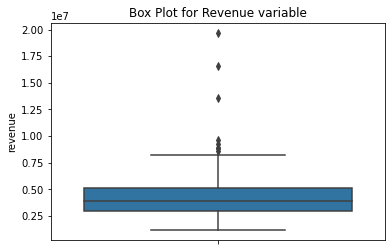

In [215]:
sns.boxplot(y = train['revenue']).set(title="Box Plot for Revenue variable")

Text(0.5, 1.0, 'Distribution plot for revenue')

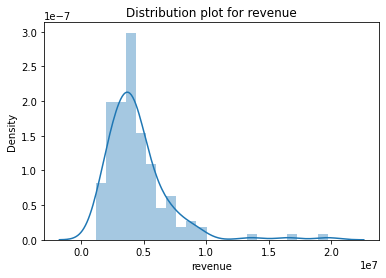

In [216]:
ax = sns.distplot(train['revenue'])
ax.set_title("Distribution plot for revenue") 

From above plot it is clear that we experience skewness in the target variable. We can observe that '**revenue**' variable is right skewed/positively skewed.
This skewness caused due to outliers. These outliers appeared might be due to a few retaurants really having higher revenue or mistakenly choosen values.
We can apply some transformations to the variable which decreases the effect of outliers.

Text(0.5, 1.0, 'Square distribution plot for revenue')

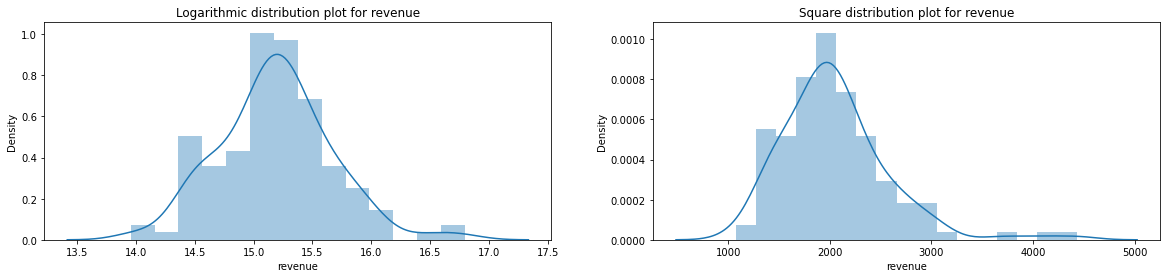

In [217]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

sns.distplot(np.log(train['revenue']),ax=ax[0]).set_title("Logarithmic distribution plot for revenue")

sns.distplot(np.sqrt(train['revenue']),ax=ax[1]).set_title("Square distribution plot for revenue")

Both 'log' and 'sqrt' transformations are still right skewed to some extent.   Here logarithmic distribution of '**revenue**' variable tends more towards normal distribution.

# **Categorical Features**

**Analyzing 'Type' column**

Training set :
FC    76
IL    60
DT     1
Name: Type, dtype: int64
-------------
Testing set :
FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64


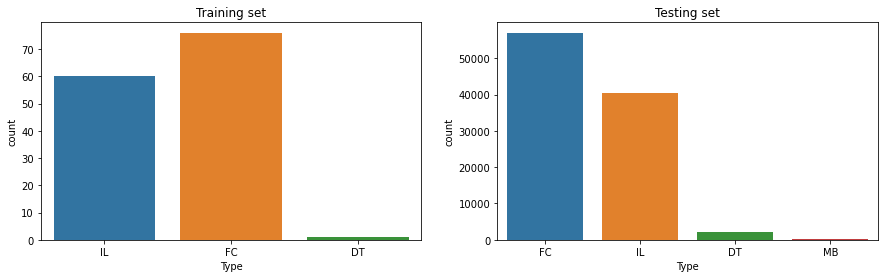

In [218]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=train['Type'],ax=ax[0]).set_title("Training set")
print("Training set :")
print(train['Type'].value_counts())

sns.countplot(x=test['Type'],ax=ax[1]).set_title("Testing set")
print("-------------")
print("Testing set :")
print(test['Type'].value_counts())

The above plots represent the count of different types of restaurants in training and testing datasets. \
Since the count of 'DT'(drive-thru) &, 'MB'(mobile) is very less, which indicates these two are the less preferred type of restaurants where 'FC'(Food Court) is the most preferred type of restaurant. \


**Analyzing 'City Group' column**

Training set :
Big Cities    78
Other         59
Name: City Group, dtype: int64
-------------
Testing set :
Other         50728
Big Cities    49272
Name: City Group, dtype: int64


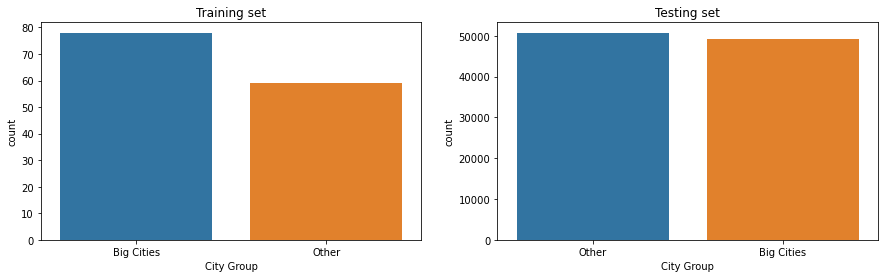

In [219]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=train['City Group'],ax=ax[0]).set_title("Training set")
print("Training set :")
print(train['City Group'].value_counts())

sns.countplot(x=test['City Group'],ax=ax[1]).set_title("Testing set")
print("-------------")
print("Testing set :")
print(test['City Group'].value_counts())

The above plots describe the count of the '**City Group**' feature in training and testing datasets. \
Here 'Big Cities' are slightly more than 'Other' in the training phase. 

**Analyzing 'City' column**

Text(0.5, 1.0, 'Countplot for City - Training set')

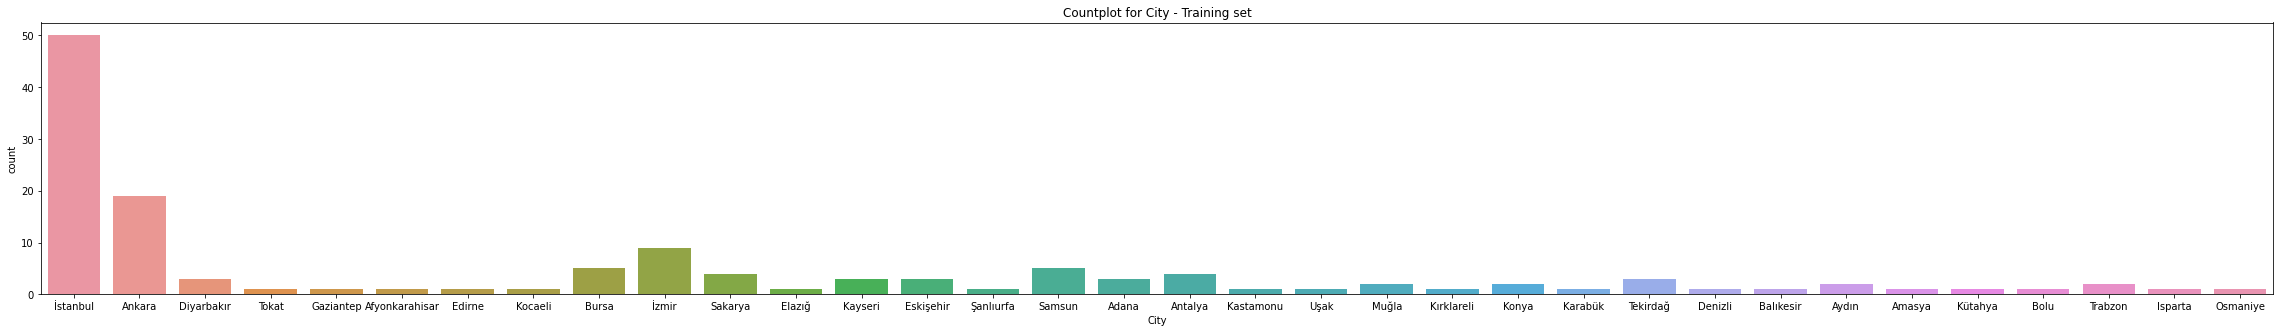

In [220]:
plt.figure(figsize=(40,5))
sns.countplot(x=train['City']).set_title("Countplot for City - Training set") 

Text(0.5, 1.0, 'Countplot for City - Testing set')

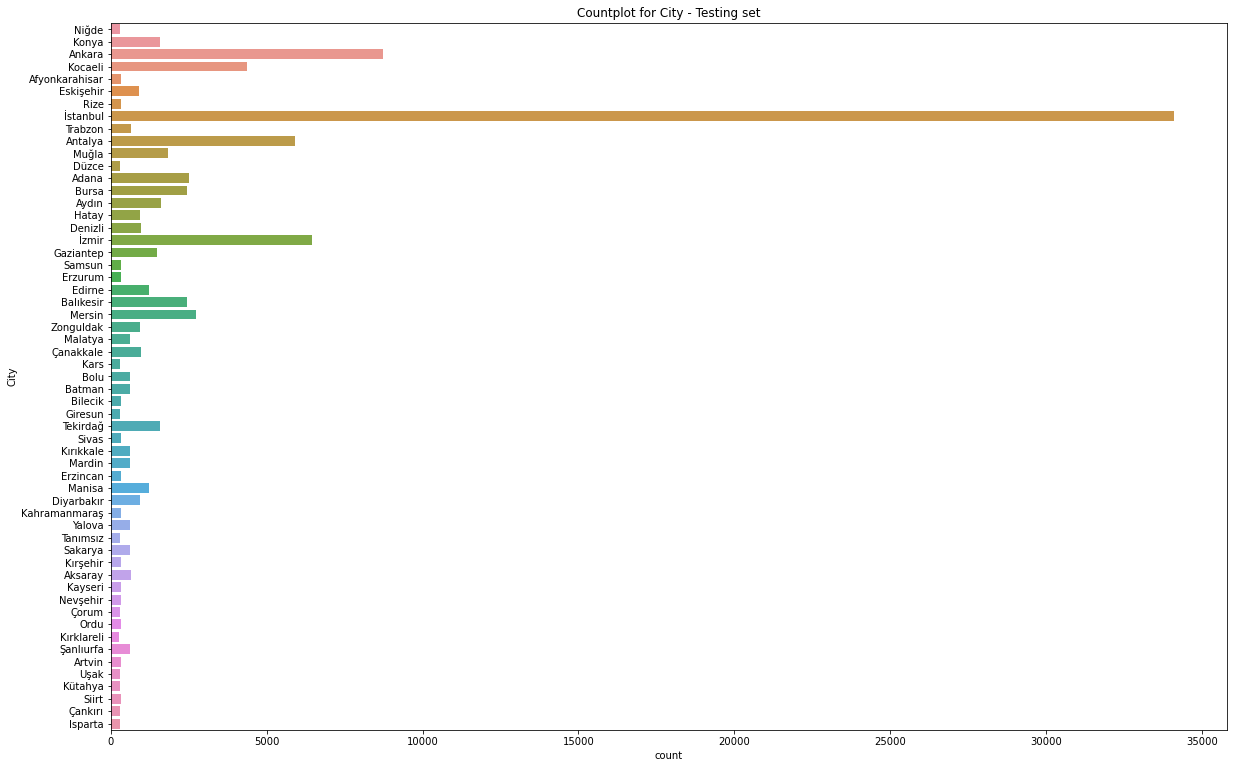

In [221]:
plt.figure(figsize=(20,13))
sns.countplot(y=test['City']).set_title("Countplot for City - Testing set")

In [222]:
print("Number of cities in training set :",train['City'].nunique())
print("Number of cities in testing set :",test['City'].nunique())

Number of cities in training set : 34
Number of cities in testing set : 57


From the above count plots of '**City**' feature, it appears that most of them prefer to open a new restaurant in cities like Istanbul, Ankara, Izmir. \


In [223]:
counts = train['City'].value_counts() #counts unique values
percent = ((train['City'].value_counts()/train['City'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent}).head(5)

count percentage
İstanbul     50      36.5%
Ankara       19      13.9%
İzmir         9       6.6%
Samsun        5       3.6%
Bursa         5       3.6%

In [224]:
counts = test['City'].value_counts() #counts unique values
percent = ((test['City'].value_counts()/test['City'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent}).head(5)

count percentage
İstanbul  34087      34.1%
Ankara     8720       8.7%
İzmir      6465       6.5%
Antalya    5911       5.9%
Kocaeli    4364       4.4%

Approx 60% of restaurants opened mainly in Istanbul,Ankara,izmir.

# **Numerical Features**

In [225]:
num_fea = train.drop(['Id','Open Date','City','City Group','Type','revenue'],axis=1)

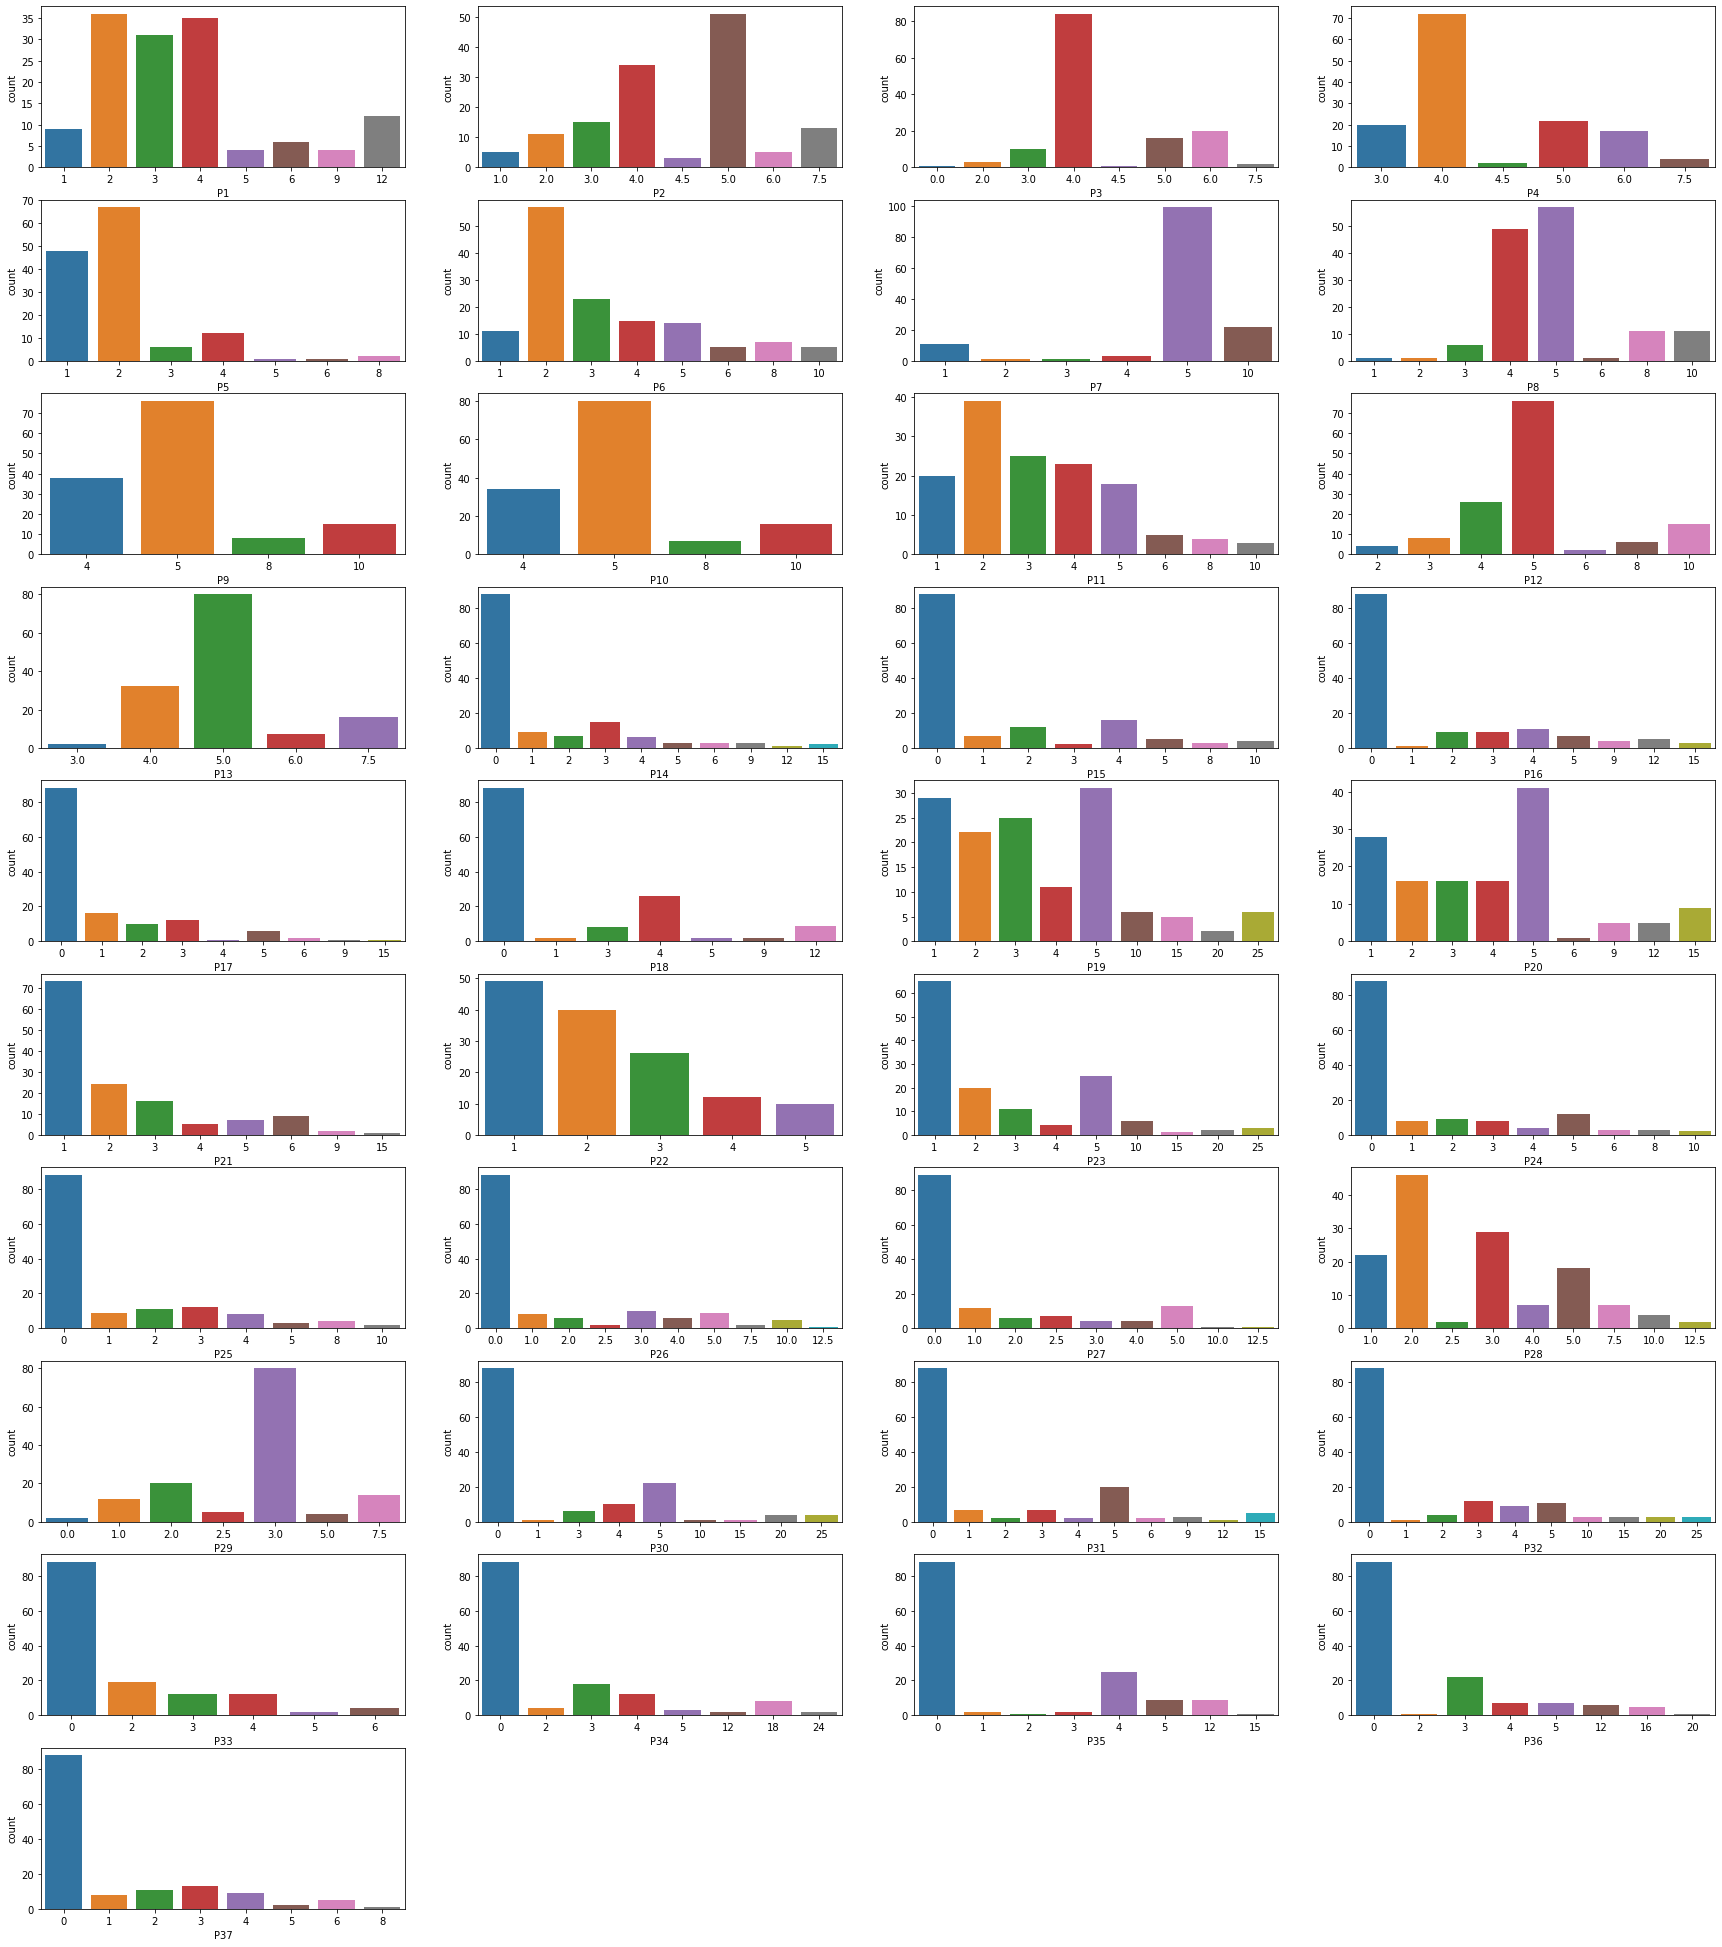

In [226]:
a = 10  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,35))

for i in num_fea:
    plt.subplot(a, b, c)
    sns.countplot((num_fea[i]))
    c = c + 1

Dataset has total 37 p-variables (P1- P37): There are three categories of these obfuscated data. They are Demographic data, Real estate data and Commercial data. \
Among these 37 numeric features, majority value for few of them are zeros 


**Type vs Revenue variable**

[Text(0.5, 1.0, 'Violinplot for Type vs Revenue')]

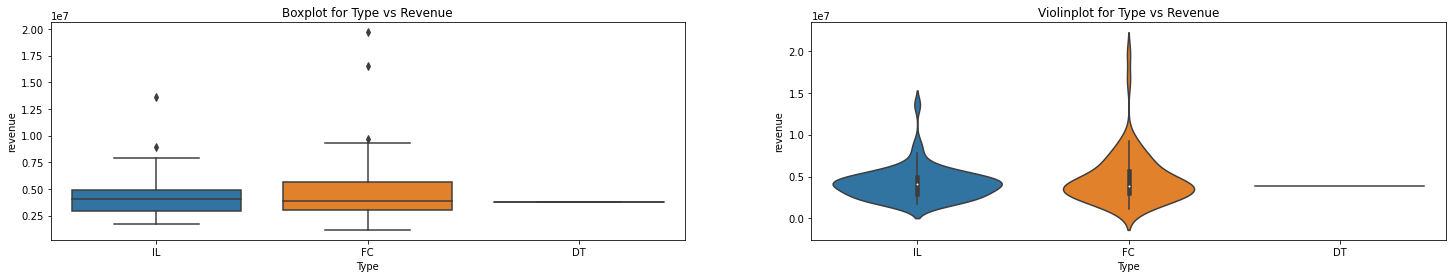

In [227]:
fig, ax = plt.subplots(1,2,figsize=(25,4))    
sns.boxplot(y=train['revenue'],x=train['Type'],ax=ax[0]).set(title='Boxplot for Type vs Revenue')
sns.violinplot(y=train['revenue'],x=train['Type'],ax=ax[1]).set(title='Violinplot for Type vs Revenue')

'FC'(FoodCourt) & 'IL'(Inline) are the preferred type of restaurants which are having similar distribution and also provides good revenue.



**City Group vs Revenue**

[Text(0.5, 1.0, 'City Group vs Revenue')]

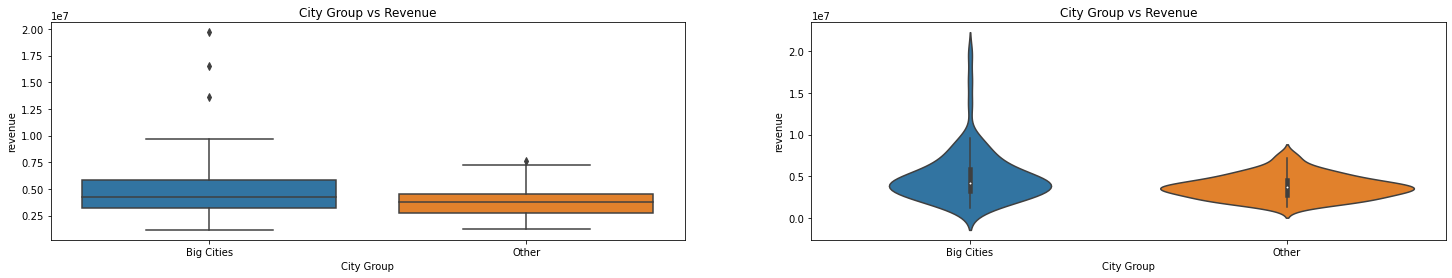

In [228]:
fig, ax = plt.subplots(1,2,figsize=(25,4))    
sns.boxplot(y=train['revenue'],x=train['City Group'],ax=ax[0]).set(title='City Group vs Revenue')
sns.violinplot(y=train['revenue'],x=train['City Group'],ax=ax[1]).set(title='City Group vs Revenue')

We can observe that few restaurants in 'Big Cities' are making a higher revenue margin. So opening a new restaurant in 'Big Cities' is preferred for getting high revenue.

**City vs Revenue**

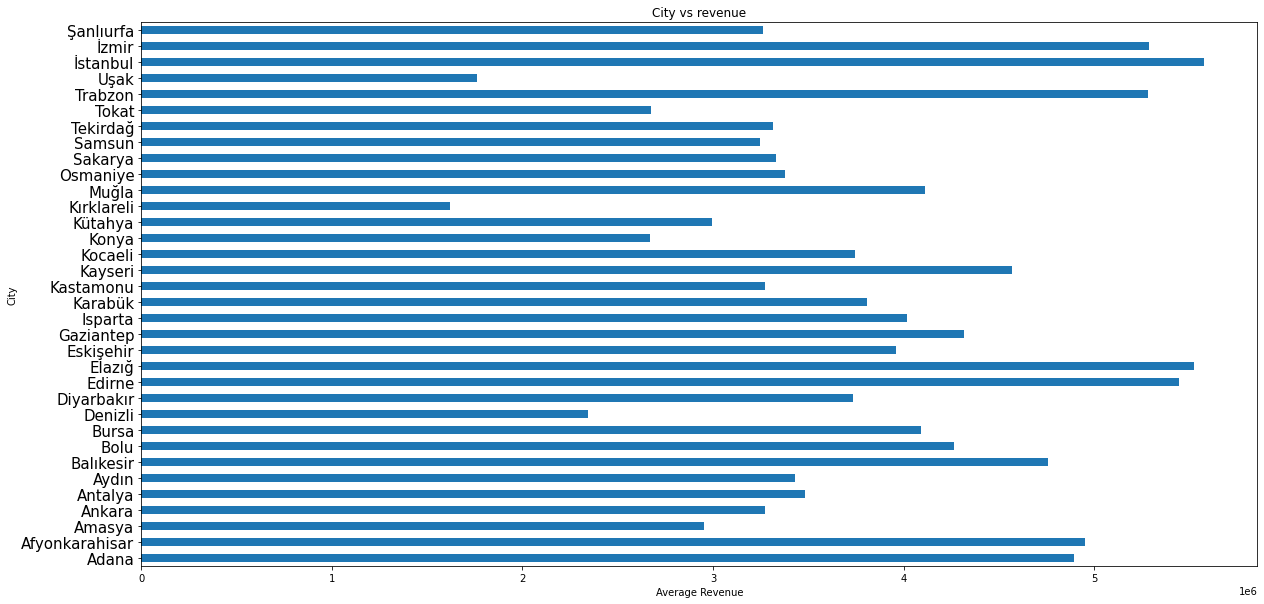

In [229]:
train.groupby(['City']).mean()['revenue'].plot.barh(figsize=(20,10))
plt.yticks(fontsize=15)
plt.title('City vs revenue')
plt.xlabel('Average Revenue')
plt.show()

Izmir, Istanbul, Elazig, and Edirne are the few cities where average revenue income is high for the restaurants

**P-variables vs Revenue**

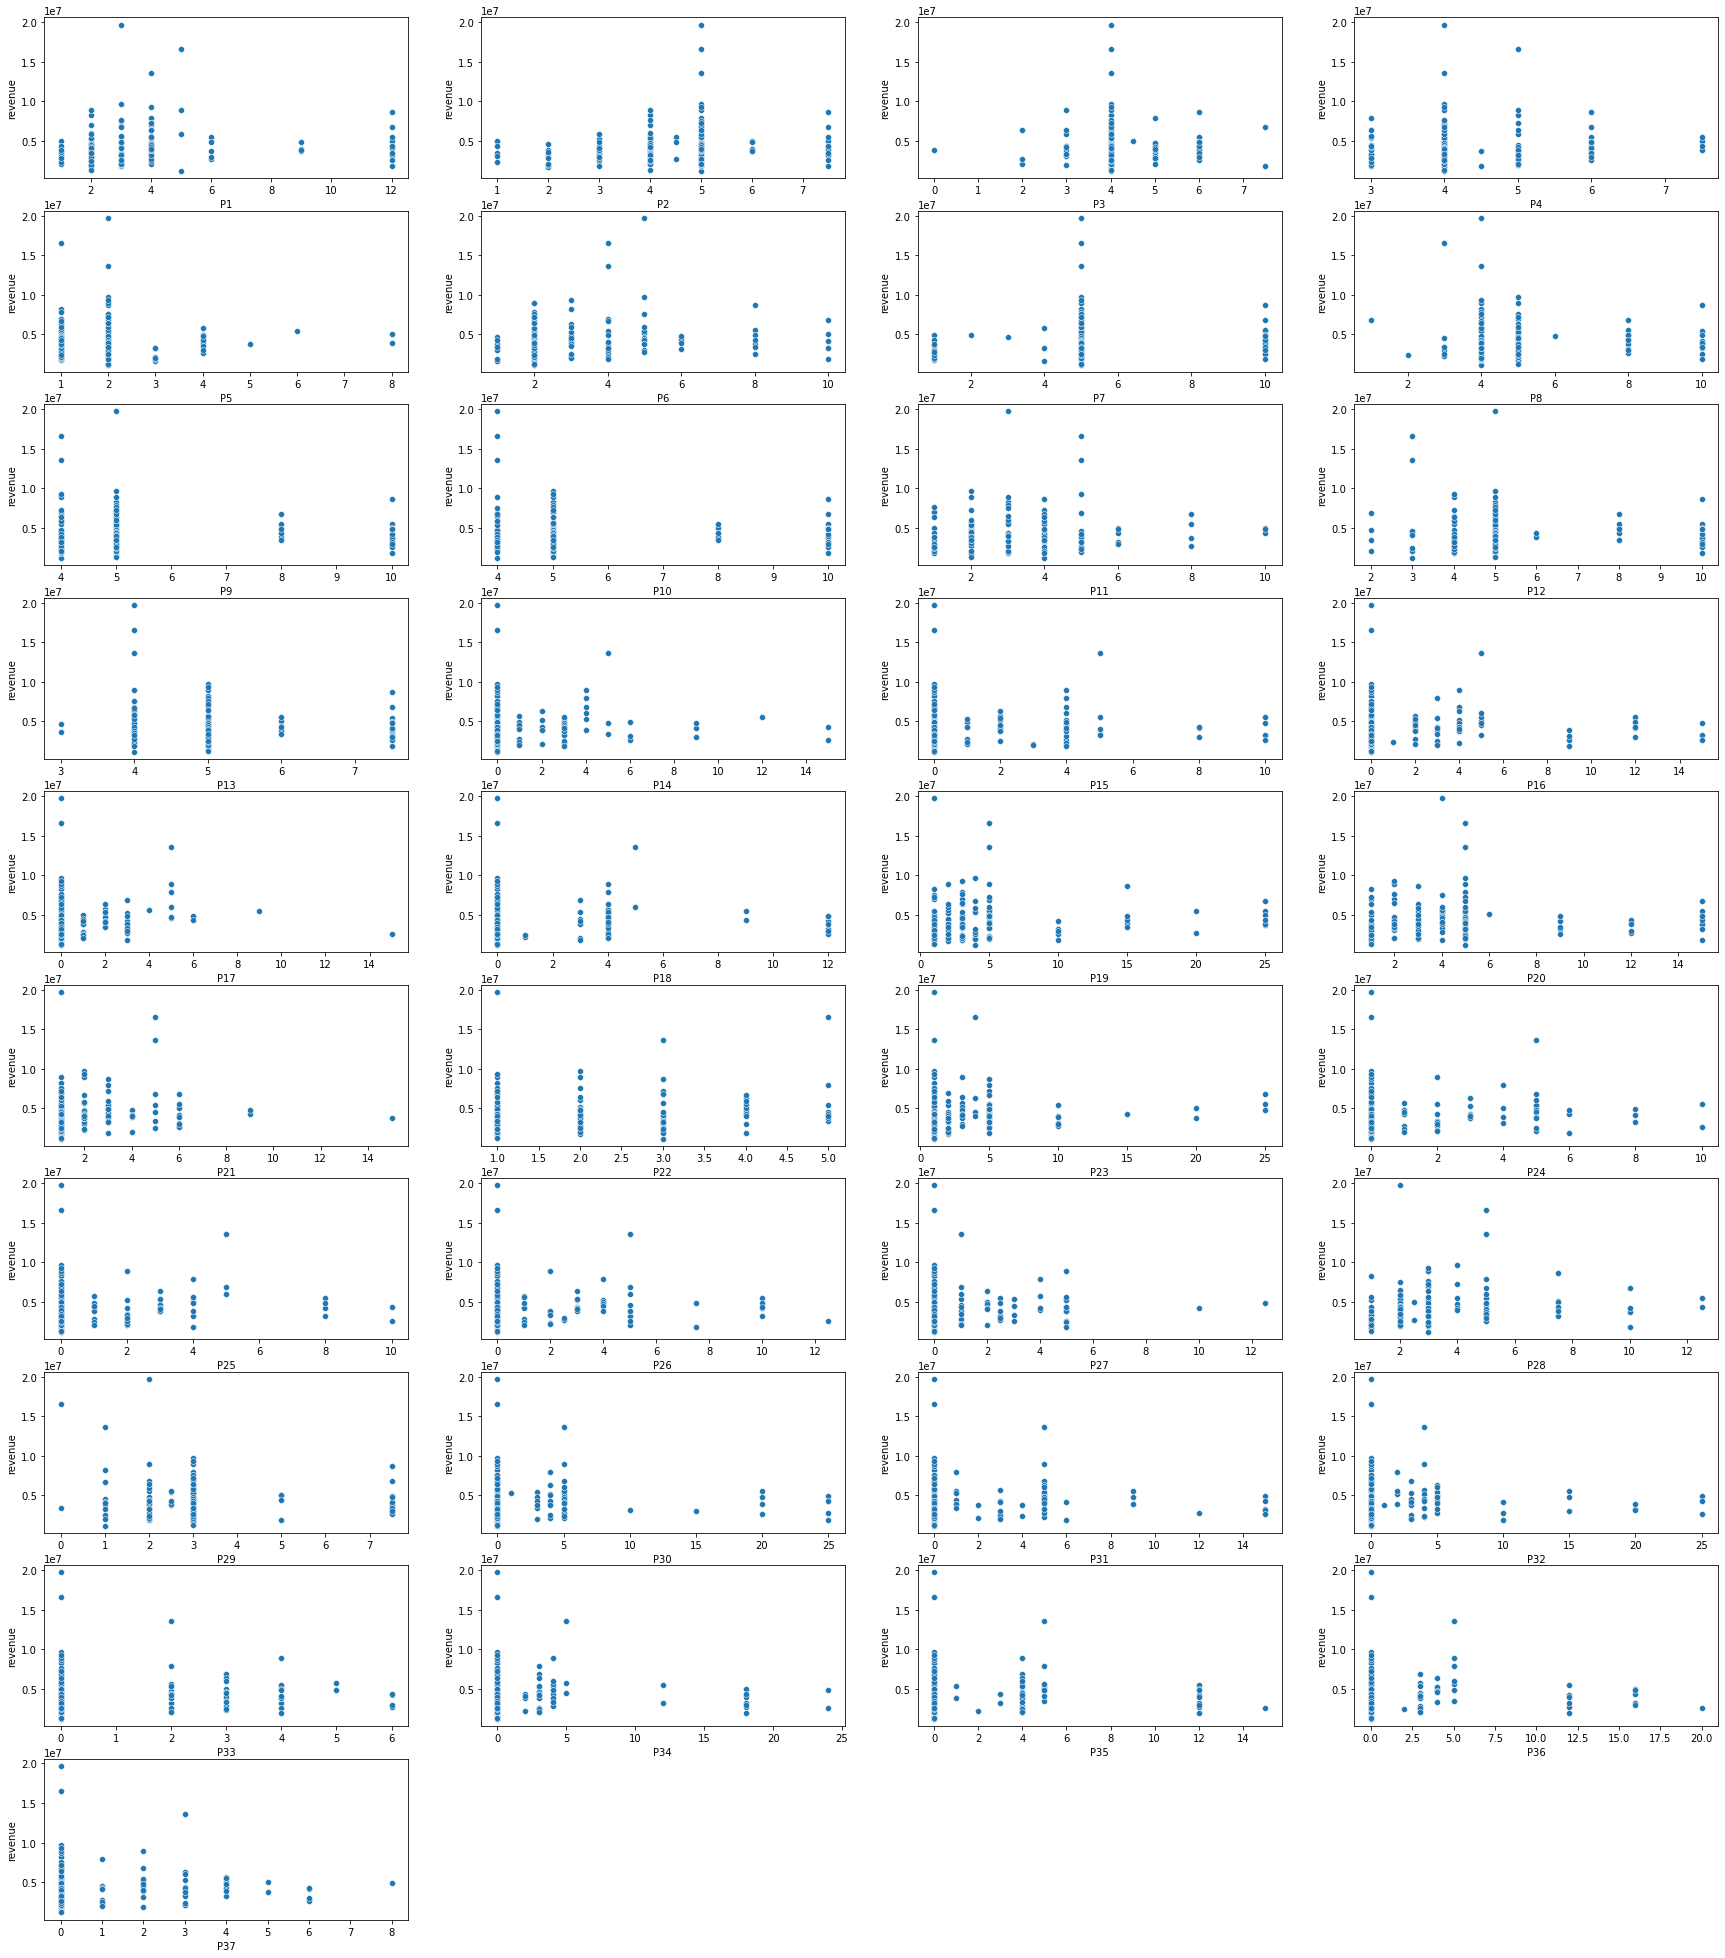

In [230]:
a = 10  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,35))

for i in num_fea:
    plt.subplot(a, b, c)
    sns.scatterplot(y=train['revenue'],x=num_fea[i])
    c = c + 1

Here we can observe that most of these features are having little or no correlation with target variable.

**Adding new features from 'Open Date' variable**

In [231]:
#generating new features from 'Open Date' feature
def newFeatures(df):
  df['Date'] = pd.to_datetime(df['Open Date'],format="%m/%d/%Y")
  df['Year'] = df['Date'].dt.year
  df['Month'] = df['Date'].dt.month
  df['Years Old'] = pd.to_datetime('18-01-2022').year - df['Date'].dt.year
  df = df.drop(['Open Date','Date'],axis=1)
  return df

train = newFeatures(train)
test = newFeatures(test)

In [232]:
test.head()

Id            City  City Group Type  P1   P2   P3   P4  P5  P6  ...  P31  \
0   0           Niğde       Other   FC   1  4.0  4.0  4.0   1   2  ...    0   
1   1           Konya       Other   IL   3  4.0  4.0  4.0   2   2  ...    0   
2   2          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   2  ...    0   
3   3         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   3  ...    4   
4   4  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   2  ...    0   

   P32  P33  P34  P35  P36  P37  Year  Month  Years Old  
0    0    0    0    0    0    0  2011      1         11  
1    0    0    0    0    0    0  2011      3         11  
2    0    0    0    0    0    0  2013     10          9  
3    0    0    0    0    0    0  2013      5          9  
4    0    0    0    0    0    0  2013      7          9  

[5 rows x 44 columns]

In [233]:
#Reordering columns
train = train[['Id','City','City Group','Type','Year','Month','Years Old','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28','P29','P30','P31','P32','P33','P34','P35','P36','P37','revenue']]
test = test[['Id','City','City Group','Type','Year','Month','Years Old','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28','P29','P30','P31','P32','P33','P34','P35','P36','P37']]

In [234]:
test['Year'].unique()

array([2011, 2013, 2007, 2008, 2006, 2012, 2004, 1998, 2009, 2000, 1996,
       2010, 2005, 1997, 2002, 1995, 2001, 1999, 2003, 2014], dtype=int64)

**Analyzing Year**

Text(0.5, 1.0, 'Year vs Revenue')

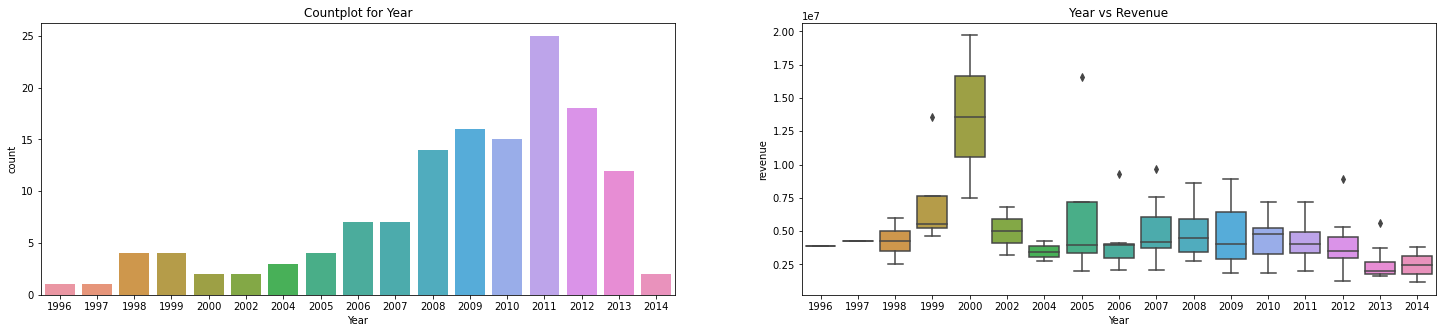

In [235]:
fig, ax = plt.subplots(1,2,figsize=(25,5))   
sns.countplot(x=train['Year'],ax=ax[0])
ax[0].set_title("Countplot for Year")

sns.boxplot(y=train['revenue'],x=train['Year'],ax=ax[1]).set_title("Year vs Revenue")

Mostly, new restaurants are opened between years 2008-2013 and in the year 2000, restaurants experienced a higher revenue.

**Analyzing Month**

Text(0.5, 1.0, 'Distribution of Month vs Revenue')

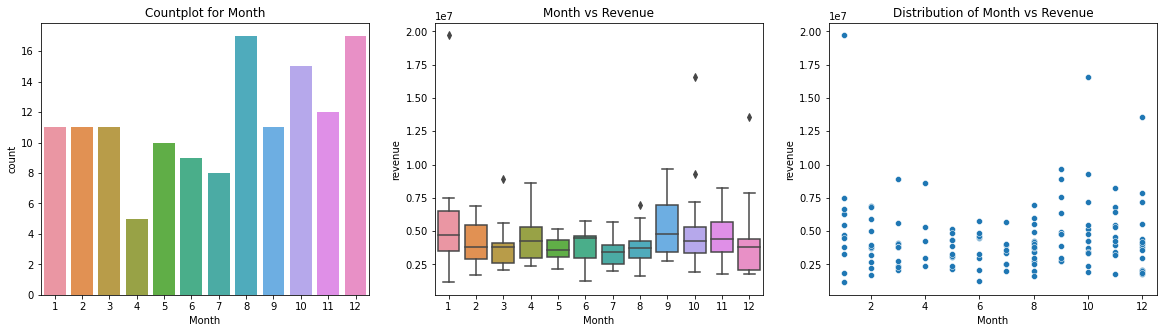

In [236]:
fig, ax = plt.subplots(1,3,figsize=(20,5))   
sns.countplot(x=train['Month'],ax=ax[0]).set_title("Countplot for Month")

sns.boxplot(x=train['Month'],y=train['revenue'],ax=ax[1])
ax[1].set_title("Month vs Revenue")

sns.scatterplot(x=train['Month'],y=train['revenue'],ax=ax[2])
ax[2].set_title("Distribution of Month vs Revenue")

Mostly new restaurants are opening during August and December. \
Restaurants are having good revenue during April and September months.

Key insights obtained from the above graph is that among other cities 'Istanbul' is the city which provides the highest revenue and also most of them are preferring to open new restaurants almost every year since 1997. 'Ankara' & 'Izmir' are the cities which provide good revenue and next to 'Istanbul' these are the most preferable cities for opening a new restaurant every year.

**Correlation Matrix**

In [237]:
# !pip install phik

In [238]:
# *****************************

interval columns not set, guessing: ['Year', 'Month', 'Years Old', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']


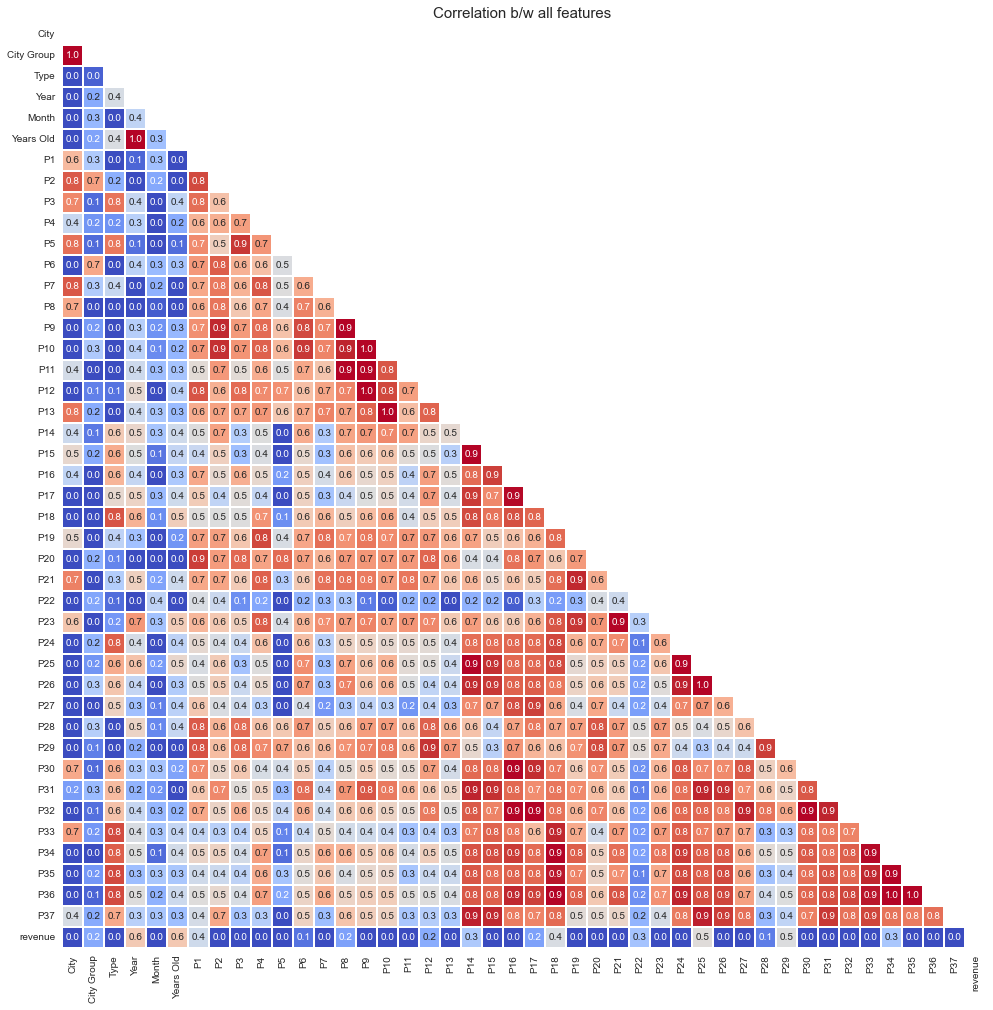

In [239]:
#https://phik.readthedocs.io/en/latest/
#http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/
#https://python-graph-gallery.com/90-heatmaps-with-various-input-format/
import phik
#Phi_corr = train.drop(['Id','Open Date'],axis=1).phik_matrix()
Phi_corr = train.drop(['Id'],axis=1).phik_matrix()

mask = np.zeros_like(Phi_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  fig, ax = plt.subplots(figsize=(20,17))         # Sample figsize in inches
  plot = sns.heatmap(Phi_corr, mask=mask, annot=True, fmt='.1f',linewidths=.5, ax=ax,cmap='coolwarm',robust=True, square=True,cbar=False) #annot=True writes data in rect boxes
  plt.title('Correlation b/w all features ',size = 15)
  plt.show()


From the above correlation matrix it is clear that most of the numerical features are having less or no correlation with 'revenue' variable. \
Most of the numerical features between P1-P37 are highly correlated with each other. It means a small change in one feature impacts changes in another feature.

In [240]:
print('\033[1m' + "Below are the top 15 correlated features to 'revenue' variable" + '\033[0m')
print(Phi_corr['revenue'].sort_values(ascending=False)[0:15])

Below are the top 15 correlated features to 'revenue' variable
revenue       1.000000
Years Old     0.564357
Year          0.560451
P25           0.469105
P29           0.453830
P18           0.443511
P1            0.411839
P14           0.319217
P34           0.306566
P22           0.292312
P12           0.219537
City Group    0.213535
P8            0.194137
P17           0.191183
P28           0.106898
Name: revenue, dtype: float64


## **SUMMARY:**



**Provided a dataset with 137 restaurants in the training phase and 100,000 restaurants for the testing phase.** \
**The target variable 'revenue' is skewed towards the right. This might be due to the presence of outliers. Hence, we applied a logarithmic transformation on the revenue feature to make them normally distributed.**

> **Type:**

Food Court(FC) & Inline(IL) are the most preferred **restaurant types**, while Drive-Thru and Mobile are the restaurant types where even most of the cities don't prefer.
Restaurant Type FC(food court) yields high revenue in Big cities. 

> **City:**

Around 60% of restaurants opened mainly in Istanbul, Ankara, Izmir. \
Istanbul is the city that provides the highest revenue and is the most preferred city to open a new restaurant.

> **City Group:**

The key insight is that **Big Cities** includes only Ankara, Istanbul, and Izmir. \
Edime, Elazig, and Trabzon are the **Other cities** that provide higher revenue.


> **Month:**

Mostly, new restaurants are opening during August and December. \
Restaurants are having good revenue during April and September months


> **P1-P37:**

Dataset has a total of 37 p-variables (P1- P37): There are three categories of these obfuscated data. They are Demographic data, Real estate data, and Commercial data.
Some of these 'P' features are highly correlated with each other and having less or no correlation with the 'revenue' variable. So these features can be neglected.
















Handling Outliers

In [241]:

train = train[train['revenue']<train['revenue'].quantile(0.98)] 

In [242]:
train.shape

(134, 45)

Text(0.5, 1.0, 'Distribution plot for revenue')

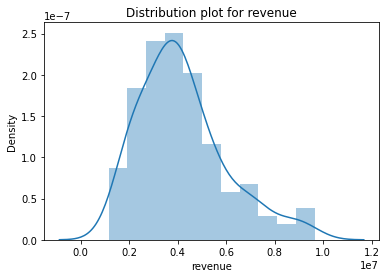

In [243]:
#After dropping outliers distribution looks good
ax = sns.distplot(train['revenue'])
ax.set_title("Distribution plot for revenue") 

In [244]:
X_train = train.drop(['Id','revenue'],axis=1)
X_test_1 = test.drop('Id',axis=1)
y_train = train['revenue']
log_y_train = np.log(train['revenue'])

In [245]:
# *********************************

In [246]:
X_train.columns

Index(['City', 'City Group', 'Type', 'Year', 'Month', 'Years Old', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',
       'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23',
       'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33',
       'P34', 'P35', 'P36', 'P37'],
      dtype='object')

In [247]:
L = ['City', 'City Group', 'Type', 'Year', 'Month', 'Years Old','P25','P29','P18','P1']

In [248]:
X_train = X_train[L]

In [249]:
train_data = X_train.copy(deep =True)

In [250]:
train_data.shape


(134, 10)

In [251]:
# cities with no. of restaurants > 3
train_data["City"].value_counts() > 3

İstanbul           True
Ankara             True
İzmir              True
Samsun             True
Bursa              True
Sakarya            True
Antalya            True
Kayseri           False
Eskişehir         False
Diyarbakır        False
Adana             False
Tekirdağ          False
Konya             False
Trabzon           False
Aydın             False
Muğla             False
Edirne            False
Elazığ            False
Osmaniye          False
Kütahya           False
Balıkesir         False
Gaziantep         False
Kastamonu         False
Kocaeli           False
Denizli           False
Uşak              False
Şanlıurfa         False
Isparta           False
Tokat             False
Kırklareli        False
Karabük           False
Amasya            False
Bolu              False
Afyonkarahisar    False
Name: City, dtype: bool

In [252]:
# one hot encoding all the major cities (where no. of restaurants are more than 3)
city_encodings = pd.get_dummies(train_data[["City"]], prefix = ['City'])
city_encodings["City_Other"] = 0
for index, rows in city_encodings.iterrows():
    if (rows["City_İstanbul"] == 0 and rows["City_Ankara"] == 0 and rows["City_İzmir"] == 0 and rows["City_Bursa"] == 0 and rows["City_Samsun"] == 0 and rows["City_Antalya"] == 0 and rows["City_Sakarya"] == 0):
        city_encodings["City_Other"][index] = 1

# chosing essential groups i.e [Cities with no. of restaurants > 3 and Other (with no. of restaurants < 3)] 
city_encodings = city_encodings[["City_İstanbul", "City_Ankara", "City_İzmir", "City_Bursa", "City_Samsun", "City_Antalya", "City_Sakarya", "City_Other"]]
city_encodings

C:\Users\balbinder.kohtra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


City_İstanbul  City_Ankara  City_İzmir  City_Bursa  City_Samsun  \
0                1            0           0           0            0   
1                0            1           0           0            0   
2                0            0           0           0            0   
3                0            0           0           0            0   
4                0            0           0           0            0   
..             ...          ...         ...         ...          ...   
132              0            0           0           0            0   
133              0            0           1           0            0   
134              0            0           0           0            0   
135              1            0           0           0            0   
136              1            0           0           0            0   

     City_Antalya  City_Sakarya  City_Other  
0               0             0           0  
1               0             0           0  
2               0             0           1  
3               0             0           1  
4               0             0           1  
..            ...           ...         ...  
132             0             0           1  
133             0             0           0  
134             0             0           1  
135             0             0           0  
136             0             0           0  

[134 rows x 8 columns]

In [253]:
city_encodings.head()

City_İstanbul  City_Ankara  City_İzmir  City_Bursa  City_Samsun  \
0              1            0           0           0            0   
1              0            1           0           0            0   
2              0            0           0           0            0   
3              0            0           0           0            0   
4              0            0           0           0            0   

   City_Antalya  City_Sakarya  City_Other  
0             0             0           0  
1             0             0           0  
2             0             0           1  
3             0             0           1  
4             0             0           1

In [254]:
train_data = pd.merge(train_data, city_encodings, left_index = True, right_index = True)

In [255]:
# train_data.drop(["City"],axis=1,inplace=True)

In [256]:
#After grouping Cities, lets group City Group feature

In [257]:
# one hot encoding City Groups
city_group_encodings = pd.get_dummies(train_data[["City Group"]], prefix = ['City Group'])
city_group_encodings

City Group_Big Cities  City Group_Other
0                        1                 0
1                        1                 0
2                        0                 1
3                        0                 1
4                        0                 1
..                     ...               ...
132                      0                 1
133                      1                 0
134                      0                 1
135                      1                 0
136                      1                 0

[134 rows x 2 columns]

In [258]:
train_data = pd.merge(train_data, city_group_encodings, left_index = True, right_index = True)

In [259]:
train_data.drop(["City Group"], axis=1,inplace=True)

In [260]:
train_data.head()

City Type  Year  Month  Years Old  P25  P29  P18  P1  City_İstanbul  \
0    İstanbul   IL  1999      7         23    1  3.0    4   4              1   
1      Ankara   FC  2008      2         14    0  3.0    0   4              0   
2  Diyarbakır   IL  2013      3          9    0  3.0    0   2              0   
3       Tokat   IL  2012      2         10    2  7.5   12   6              0   
4   Gaziantep   IL  2009      5         13    3  3.0    4   3              0   

   City_Ankara  City_İzmir  City_Bursa  City_Samsun  City_Antalya  \
0            0           0           0            0             0   
1            1           0           0            0             0   
2            0           0           0            0             0   
3            0           0           0            0             0   
4            0           0           0            0             0   

   City_Sakarya  City_Other  City Group_Big Cities  City Group_Other  
0             0           0                      1                 0  
1             0           0                      1                 0  
2             0           1                      0                 1  
3             0           1                      0                 1  
4             0           1                      0                 1

In [261]:
#After grouping Cities, lets group Type feature

In [262]:
#Since there is no MB feature and very less DT feature values. Lets combine them and make them one as "Other_Type"

In [263]:
type_encodings = pd.get_dummies(train_data[["Type"]], prefix = ['Type'])
type_encodings["Type_Other"] = 0
for index, rows in type_encodings.iterrows():
    if (rows["Type_DT"] == 0 and rows["Type_FC"] == 0):
        type_encodings["Type_Other"][index] = 1
type_encodings = type_encodings[["Type_DT","Type_FC","Type_Other"]]
type_encodings

C:\Users\balbinder.kohtra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Type_DT  Type_FC  Type_Other
0          0        0           1
1          0        1           0
2          0        0           1
3          0        0           1
4          0        0           1
..       ...      ...         ...
132        0        1           0
133        0        1           0
134        0        1           0
135        0        1           0
136        0        1           0

[134 rows x 3 columns]

In [264]:
train_data = pd.merge(train_data, type_encodings, left_index = True, right_index = True)

In [265]:
train_data.head()

City Type  Year  Month  Years Old  P25  P29  P18  P1  City_İstanbul  \
0    İstanbul   IL  1999      7         23    1  3.0    4   4              1   
1      Ankara   FC  2008      2         14    0  3.0    0   4              0   
2  Diyarbakır   IL  2013      3          9    0  3.0    0   2              0   
3       Tokat   IL  2012      2         10    2  7.5   12   6              0   
4   Gaziantep   IL  2009      5         13    3  3.0    4   3              0   

   ...  City_Bursa  City_Samsun  City_Antalya  City_Sakarya  City_Other  \
0  ...           0            0             0             0           0   
1  ...           0            0             0             0           0   
2  ...           0            0             0             0           1   
3  ...           0            0             0             0           1   
4  ...           0            0             0             0           1   

   City Group_Big Cities  City Group_Other  Type_DT  Type_FC  Type_Other  
0                      1                 0        0        0           1  
1                      1                 0        0        1           0  
2                      0                 1        0        0           1  
3                      0                 1        0        0           1  
4                      0                 1        0        0           1  

[5 rows x 22 columns]

In [266]:
#removing open date
train_data.drop(["City",'Type','Year','Month'],axis=1,inplace=True)

In [267]:
train_data.head()

Years Old  P25  P29  P18  P1  City_İstanbul  City_Ankara  City_İzmir  \
0         23    1  3.0    4   4              1            0           0   
1         14    0  3.0    0   4              0            1           0   
2          9    0  3.0    0   2              0            0           0   
3         10    2  7.5   12   6              0            0           0   
4         13    3  3.0    4   3              0            0           0   

   City_Bursa  City_Samsun  City_Antalya  City_Sakarya  City_Other  \
0           0            0             0             0           0   
1           0            0             0             0           0   
2           0            0             0             0           1   
3           0            0             0             0           1   
4           0            0             0             0           1   

   City Group_Big Cities  City Group_Other  Type_DT  Type_FC  Type_Other  
0                      1                 0        0        0           1  
1                      1                 0        0        1           0  
2                      0                 1        0        0           1  
3                      0                 1        0        0           1  
4                      0                 1        0        0           1

In [268]:
train_data.shape

(134, 18)

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, log_y_train, test_size = 0.1, random_state = 0)

In [270]:
X_test.shape


(14, 18)

In [271]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
X_train_scale = scaler.fit_transform(X_train)

X_test_scale = scaler.transform(X_test)

In [272]:
import tensorflow
print(tensorflow.__version__)

2.7.0


In [273]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [274]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 18))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(1))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [275]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                190       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [276]:
# ******************************************

In [277]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train_scale, y_train,validation_split=0.2, batch_size = 100,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 945ms/step - loss: 226.4260 - mse: 226.4260 - val_loss: 223.9494 - val_mse: 223.9494
Epoch 2/100
1/1 [==============================] - 0s 53ms/step - loss: 225.6758 - mse: 225.6758 - val_loss: 223.2692 - val_mse: 223.2692
Epoch 3/100
1/1 [==============================] - 0s 55ms/step - loss: 224.9283 - mse: 224.9283 - val_loss: 222.5942 - val_mse: 222.5942
Epoch 4/100
1/1 [==============================] - 0s 54ms/step - loss: 224.1821 - mse: 224.1821 - val_loss: 221.9242 - val_mse: 221.9242
Epoch 5/100
1/1 [==============================] - 0s 56ms/step - loss: 223.4353 - mse: 223.4353 - val_loss: 221.2699 - val_mse: 221.2699
Epoch 6/100
1/1 [==============================] - 0s 52ms/step - loss: 222.6928 - mse: 222.6928 - val_loss: 220.6250 - val_mse: 220.6250
Epoch 7/100
1/1 [==============================] - 0s 50ms/step - loss: 221.9567 - mse: 221.9567 - val_loss: 219.9880 - val_mse: 219.9880
Epoch 8/100
1/1 [================

Epoch 60/100
1/1 [==============================] - 0s 49ms/step - loss: 189.6630 - mse: 189.6630 - val_loss: 191.3739 - val_mse: 191.3739
Epoch 61/100
1/1 [==============================] - 0s 48ms/step - loss: 189.0948 - mse: 189.0948 - val_loss: 190.8614 - val_mse: 190.8614
Epoch 62/100
1/1 [==============================] - 0s 48ms/step - loss: 188.5234 - mse: 188.5234 - val_loss: 190.3460 - val_mse: 190.3460
Epoch 63/100
1/1 [==============================] - 0s 49ms/step - loss: 187.9478 - mse: 187.9478 - val_loss: 189.8279 - val_mse: 189.8279
Epoch 64/100
1/1 [==============================] - 0s 53ms/step - loss: 187.3678 - mse: 187.3678 - val_loss: 189.3064 - val_mse: 189.3064
Epoch 65/100
1/1 [==============================] - 0s 49ms/step - loss: 186.7847 - mse: 186.7847 - val_loss: 188.7827 - val_mse: 188.7827
Epoch 66/100
1/1 [==============================] - 0s 48ms/step - loss: 186.1929 - mse: 186.1929 - val_loss: 188.2564 - val_mse: 188.2564
Epoch 67/100
1/1 [=========

In [278]:

model_history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

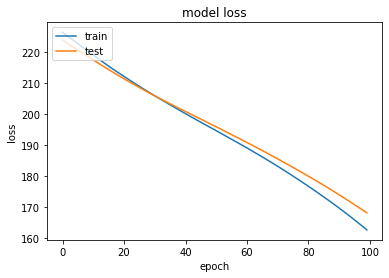

In [279]:
# summarize history for loss
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [280]:
#Using Keras Tuner to tune the Model

In [281]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)))
    model.add(layers.Dense(1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mse'])
    return model

In [282]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [283]:
tuner = RandomSearch(
    build_model,
    objective='val_mse',
    max_trials=5,
    executions_per_trial=3,
    directory='project2',
    project_name='Restaurant Revenue Prediction')

In [284]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_split=0.2)

Trial 5 Complete [00h 00m 11s]
val_mse: 12.968966484069824

Best val_mse So Far: 12.968966484069824
Total elapsed time: 00h 00m 53s
INFO:tensorflow:Oracle triggered exit


In [285]:
tuner.results_summary()

Results summary
Results in project2\Restaurant Revenue Prediction
Showing 10 best trials
Objective(name='val_mse', direction='min')
Trial summary
Hyperparameters:
num_layers: 14
units_0: 448
dropout: 0.09
units_1: 128
learning_rate: 0.001
units_2: 224
units_3: 96
units_4: 384
units_5: 384
units_6: 160
units_7: 160
units_8: 320
units_9: 192
units_10: 256
units_11: 448
units_12: 352
units_13: 128
Score: 12.968966484069824
Trial summary
Hyperparameters:
num_layers: 11
units_0: 320
dropout: 0.1
units_1: 480
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
Score: 49.51632849375407
Trial summary
Hyperparameters:
num_layers: 14
units_0: 288
dropout: 0.05
units_1: 320
learning_rate: 0.01
units_2: 128
units_3: 416
units_4: 96
units_5: 480
units_6: 480
units_7: 256
units_8: 416
units_9: 448
units_10: 320
units_11: 32
units_12: 32
units_13: 32
Score: 115.86960983276367
Trial summary
Hyperparameters:
num_layers: 14
un

In [286]:
best_model = tuner.get_best_models(num_models=1)[0]

In [287]:
loss,mse = best_model.evaluate(X_test_scale, y_test)

1/1 [==============================] - 1s 912ms/step - loss: 132.8628 - mse: 132.8628


In [288]:
mse

132.86280822753906

In [289]:
# # Initialising the ANN
# classifier = Sequential()

# # Adding the input layer and the first hidden layer
# classifier.add(Dense(units = 280,kernel_initializer='he_uniform',activation='relu',input_dim = 18))

# # Adding the second hidden layer
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))

# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# # Adding the output layer
# classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# # Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [290]:
# Test Data preprcossing

In [291]:
X_test_1.shape


(100000, 43)

In [292]:
X_test_1.columns

Index(['City', 'City Group', 'Type', 'Year', 'Month', 'Years Old', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',
       'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23',
       'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33',
       'P34', 'P35', 'P36', 'P37'],
      dtype='object')

In [293]:
L = ['City', 'City Group', 'Type', 'Year', 'Month', 'Years Old','P25','P29','P18','P1']

In [294]:
test = X_test_1[L].copy(deep =True)

In [295]:
test.shape

(100000, 10)

In [296]:
# one hot encoding all the major cities (where no. of restaurants are more than 3)
city_encodings = pd.get_dummies(test[["City"]], prefix = ['City'])
city_encodings["City_Other"] = 0
for index, rows in city_encodings.iterrows():
    if (rows["City_İstanbul"] == 0 and rows["City_Ankara"] == 0 and rows["City_İzmir"] == 0 and rows["City_Bursa"] == 0 and rows["City_Samsun"] == 0 and rows["City_Antalya"] == 0 and rows["City_Sakarya"] == 0):
        city_encodings["City_Other"][index] = 1

# chosing essential groups i.e [Cities with no. of restaurants > 3 and Other (with no. of restaurants < 3)] 
city_encodings = city_encodings[["City_İstanbul", "City_Ankara", "City_İzmir", "City_Bursa", "City_Samsun", "City_Antalya", "City_Sakarya", "City_Other"]]
city_encodings

C:\Users\balbinder.kohtra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


City_İstanbul  City_Ankara  City_İzmir  City_Bursa  City_Samsun  \
0                  0            0           0           0            0   
1                  0            0           0           0            0   
2                  0            1           0           0            0   
3                  0            0           0           0            0   
4                  0            0           0           0            0   
...              ...          ...         ...         ...          ...   
99995              0            0           0           0            0   
99996              0            0           0           0            0   
99997              1            0           0           0            0   
99998              1            0           0           0            0   
99999              1            0           0           0            0   

       City_Antalya  City_Sakarya  City_Other  
0                 0             0           1  
1                 0             0           1  
2                 0             0           0  
3                 0             0           1  
4                 0             0           1  
...             ...           ...         ...  
99995             1             0           0  
99996             0             0           1  
99997             0             0           0  
99998             0             0           0  
99999             0             0           0  

[100000 rows x 8 columns]

In [297]:
test = pd.merge(test, city_encodings, left_index = True, right_index = True)

In [298]:
# one hot encoding City Groups
city_group_encodings = pd.get_dummies(test[["City Group"]], prefix = ['City Group'])
city_group_encodings

City Group_Big Cities  City Group_Other
0                          0                 1
1                          0                 1
2                          1                 0
3                          0                 1
4                          0                 1
...                      ...               ...
99995                      0                 1
99996                      0                 1
99997                      1                 0
99998                      1                 0
99999                      1                 0

[100000 rows x 2 columns]

In [299]:
test = pd.merge(test, city_group_encodings, left_index = True, right_index = True)

In [300]:
test.drop(["City Group"], axis=1,inplace=True)

In [301]:
type_encodings = pd.get_dummies(test[["Type"]], prefix = ['Type'])
type_encodings["Type_Other"] = 0
for index, rows in type_encodings.iterrows():
    if (rows["Type_DT"] == 0 and rows["Type_FC"] == 0):
        type_encodings["Type_Other"][index] = 1
type_encodings = type_encodings[["Type_DT","Type_FC","Type_Other"]]
type_encodings

C:\Users\balbinder.kohtra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Type_DT  Type_FC  Type_Other
0            0        1           0
1            0        0           1
2            0        1           0
3            0        0           1
4            0        1           0
...        ...      ...         ...
99995        0        1           0
99996        0        0           1
99997        0        0           1
99998        0        1           0
99999        0        0           1

[100000 rows x 3 columns]

In [302]:
test = pd.merge(test, type_encodings, left_index = True, right_index = True)

In [303]:
#removing open date
test.drop(["City",'Type','Year','Month'],axis=1,inplace=True)

In [304]:
test.shape

(100000, 18)

In [305]:
X_test = scaler.transform(test)

In [306]:
ynew = classifier.predict(X_test)

In [308]:
for i in range(3):
    print("X=%s, Predicted=%s" % (X_test[i], ynew[i]))
